# Censo Escolar 2017

In [7]:
import pandas as pd
from math import trunc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DOCENTES_CO.csv', sep='|', encoding='iso-8859-1', low_memory=False)

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905327 entries, 0 to 905326
Data columns (total 132 columns):
NU_ANO_CENSO                      int64
CO_PESSOA_FISICA                  int64
NU_DIA                            int64
NU_MES                            int64
NU_ANO                            int64
NU_IDADE_REFERENCIA               int64
NU_IDADE                          int64
TP_SEXO                           int64
TP_COR_RACA                       int64
TP_NACIONALIDADE                  int64
CO_PAIS_ORIGEM                    int64
CO_UF_NASC                        float64
CO_MUNICIPIO_NASC                 float64
CO_UF_END                         float64
CO_MUNICIPIO_END                  float64
TP_ZONA_RESIDENCIAL               float64
IN_NECESSIDADE_ESPECIAL           int64
IN_CEGUEIRA                       float64
IN_BAIXA_VISAO                    float64
IN_SURDEZ                         float64
IN_DEF_AUDITIVA                   float64
IN_SURDOCEGUEIRA              

In [14]:
media = df.loc[:,'NU_IDADE'].mean()
anos = trunc(media)
meses = (media - anos) * 12
meses_trunc = trunc(meses)
dias = trunc((meses - meses_trunc) * 30)

In [15]:
print('A idade média dos professores da região centro-oeste é de {} anos, {} meses e {} dias.'.format(anos, meses_trunc, dias))

A idade média dos professores da região centro-oeste é de 39 anos, 5 meses e 23 dias.


In [16]:
df['TP_SEXO'].value_counts(normalize = True)

2    0.691672
1    0.308328
Name: TP_SEXO, dtype: float64

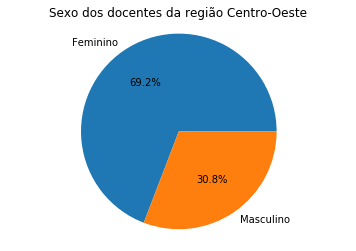

In [25]:
labels = ('Feminino', 'Masculino')
sizes = df['TP_SEXO'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sexo dos docentes da região Centro-Oeste')
plt.show()

In [23]:
df['TP_COR_RACA'].value_counts(normalize = True)

1    0.371480
3    0.327663
0    0.242000
2    0.043106
5    0.008754
4    0.006997
Name: TP_COR_RACA, dtype: float64

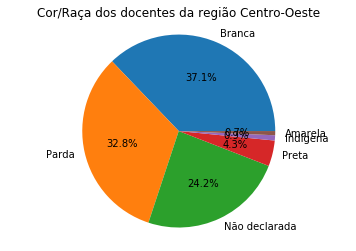

In [27]:
labels = ('Branca', 'Parda', 'Não declarada', 'Preta', 'Indígena', 'Amarela')
sizes = df['TP_COR_RACA'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Cor/Raça dos docentes da região Centro-Oeste')
plt.show()

In [72]:
paises_prof = df.loc[:, ['CO_PESSOA_FISICA', 'CO_PAIS_ORIGEM']]

In [73]:
paises_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905327 entries, 0 to 905326
Data columns (total 2 columns):
CO_PESSOA_FISICA    905327 non-null int64
CO_PAIS_ORIGEM      905327 non-null int64
dtypes: int64(2)
memory usage: 13.8 MB


In [74]:
paises_prof['CO_PAIS_ORIGEM'].value_counts(normalize = True)

76     0.997940
604    0.000294
68     0.000221
600    0.000209
840    0.000169
724    0.000163
152    0.000151
32     0.000147
250    0.000089
170    0.000062
192    0.000057
484    0.000054
620    0.000054
218    0.000050
858    0.000046
624    0.000031
999    0.000027
862    0.000020
24     0.000020
372    0.000015
392    0.000015
422    0.000015
410    0.000013
826    0.000011
36     0.000011
124    0.000011
558    0.000010
156    0.000009
616    0.000009
214    0.000008
384    0.000008
504    0.000008
528    0.000007
324    0.000006
364    0.000006
222    0.000006
630    0.000004
276    0.000004
450    0.000004
498    0.000002
112    0.000002
752    0.000002
807    0.000002
380    0.000002
704    0.000001
768    0.000001
275    0.000001
340    0.000001
Name: CO_PAIS_ORIGEM, dtype: float64

In [66]:
paises = pd.read_csv('paises.csv', sep=';', encoding='iso-8859-1')

In [67]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
CO_PAIS_ORIGEM    250 non-null int64
NO_PAIS_ORIGEM    250 non-null object
dtypes: int64(1), object(1)
memory usage: 4.0+ KB


In [75]:
result = paises_prof.merge(paises, how='inner', on='CO_PAIS_ORIGEM')

In [76]:
result

,CO_PESSOA_FISICA,CO_PAIS_ORIGEM,NO_PAIS_ORIGEM
0,117579049642,76,BRASIL
1,117579049642,76,BRASIL
2,117579049642,76,BRASIL
3,113802839063,76,BRASIL
4,113802839063,76,BRASIL
5,113802839063,76,BRASIL
6,113802839063,76,BRASIL
7,113802839063,76,BRASIL
8,113802839063,76,BRASIL
9,113802839063,76,BRASIL


In [101]:
raca_estado = df.loc[:, ['CO_PESSOA_FISICA', 'TP_COR_RACA', 'CO_UF']]

In [102]:
raca_estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905327 entries, 0 to 905326
Data columns (total 3 columns):
CO_PESSOA_FISICA    905327 non-null int64
TP_COR_RACA         905327 non-null int64
CO_UF               905327 non-null int64
dtypes: int64(3)
memory usage: 20.7 MB


In [103]:
indigenas = raca_estado.loc[raca_estado['TP_COR_RACA'] == 5]

In [104]:
indigenas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7925 entries, 2782 to 904799
Data columns (total 3 columns):
CO_PESSOA_FISICA    7925 non-null int64
TP_COR_RACA         7925 non-null int64
CO_UF               7925 non-null int64
dtypes: int64(3)
memory usage: 247.7 KB


In [105]:
indigenas = indigenas.dropna()

In [106]:
indigenas['CO_UF'].value_counts(normalize = True)

50    0.507003
51    0.388644
52    0.077603
53    0.026751
Name: CO_UF, dtype: float64

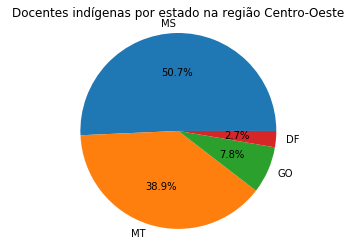

In [107]:
labels = ('MS', 'MT', 'GO', 'DF')
sizes = indigenas['CO_UF'].value_counts(normalize = True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Docentes indígenas por estado na região Centro-Oeste')
plt.show()